# Курсовая работа
## Оптимизация входных данных для предиктивных моделей. Изучение с сравнение различных предиктивных моделей.

## ГЛАВА 1. ИЗУЧЕНИЕ МОДЕЛИ ДАННЫХ

### 1.1 Загрузка данных

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Read student data
dataset = datasets.load_iris()
print("Dataset is successfully loaded!")

Dataset is successfully loaded!


In [2]:
# Calculate size of the dataset
dataset_length = len(dataset.data)
print("Size of the dataset: {}\n".format(dataset_length))

# Calculate number of features and print its names
features_length = len(dataset.feature_names)
print("Number of features: {}".format(features_length))
print("Features: {}\n".format(dataset.feature_names))

# Calculate number of labels and print its names
n_labels = len(dataset.target_names)
print("Number of labels: {}".format(n_labels))
print("Labels: {}\n".format(dataset.target_names))

# Calculate how many entries with each label are presented
for idx, val in enumerate(dataset.target_names):
    label_size = [row for row in dataset.target if idx == row]
    label_percentage = float(len(label_size))/dataset_length*100
    print("Number of {} in the dataset: {} ({:.2f}%)".format(val, len(label_size), label_percentage))

Size of the dataset: 150

Number of features: 4
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Number of labels: 3
Labels: ['setosa' 'versicolor' 'virginica']

Number of setosa in the dataset: 50 (33.33%)
Number of versicolor in the dataset: 50 (33.33%)
Number of virginica in the dataset: 50 (33.33%)


In [3]:
# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = dataset.data
y_all = dataset.target

# Show the feature information by printing the first five rows
print("\nFeature values:")
print(X_all[:5])

print("\nLabel values:")
print(y_all[:5])


Feature values:
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]

Label values:
[0 0 0 0 0]


### 1.2 Изучение влияния свойств ирисов на принадлежность конкретному классу

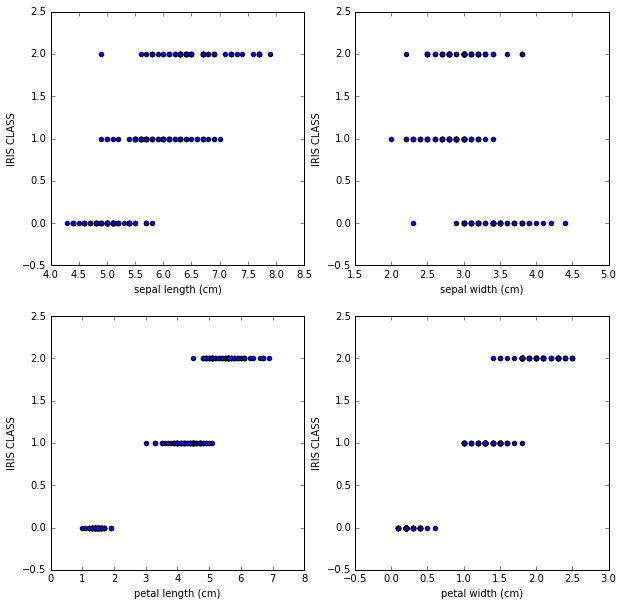

In [5]:
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
Y = dataset.target

fig = plt.figure(figsize=(10, 10))

for i, column in enumerate(X.columns):
    subplt = fig.add_subplot(2, 2, i+1)
    subplt.scatter(X[column], Y)
    subplt.set_xlabel(column)
    subplt.set_ylabel('IRIS CLASS')

fig.show()

### 1.3 Разделение набора данных на наборы для обучения и тестирования

In [6]:
# TODO: Import any additional functionality you may need here
from sklearn import cross_validation
# TODO: Set the number of training points
num_train = 100

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_all, y_all,
                                                                     train_size=num_train,
                                                                     test_size=num_test,
                                                                     random_state=True)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

# Show the feature information by printing the first five rows
print("\nFeature values example:")
print(X_train[:5])

print("\nLabel values example:")
print(y_train[:5])

Training set has 100 samples.
Testing set has 50 samples.

Feature values example:
[[ 5.1  3.4  1.5  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 7.7  3.8  6.7  2.2]
 [ 6.9  3.1  5.4  2.1]
 [ 7.3  2.9  6.3  1.8]]

Label values example:
[0 0 2 2 2]


## ГЛАВА 2. СРАВНЕНИЕ И ОЦЕНКА ПРЕДИКТИВНЫХ МОДЕЛЕЙ

## 2.1 Компромисс между смещением и дисперсией

In [7]:
from sklearn import metrics 

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """
        
    error = metrics.mean_squared_error(y_true, y_predict)
    return error

In [8]:
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    print("Creating learning curve graphs for max_depths of 1, 2, 3, and 4. . .")

    # Create the figure window
    fig = plt.figure(figsize=(10, 8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1, 2, 3, 4]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

Creating learning curve graphs for max_depths of 1, 2, 3, and 4. . .


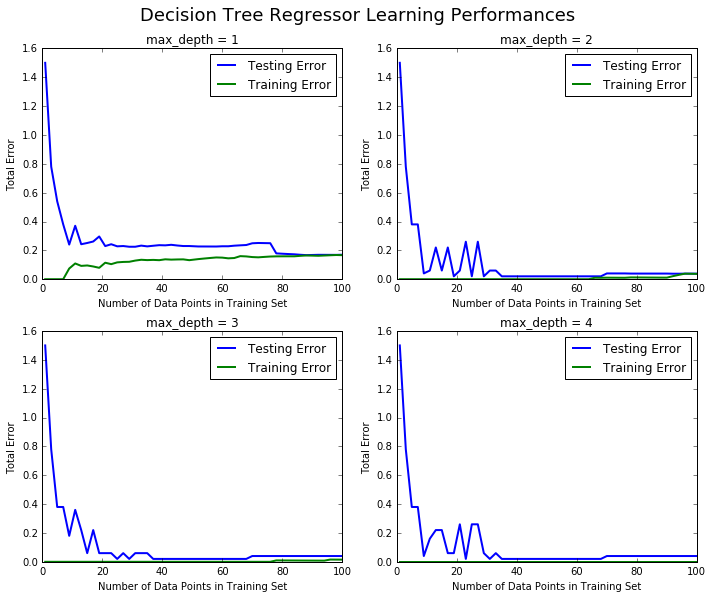

In [9]:
learning_curves(X_train, y_train, X_test, y_test)

## 2.2 Качество предсказаний модели

In [10]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print("Creating a model complexity graph. . . ")

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 5)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    plt.figure(figsize=(7, 5))
    plt.title('Decision Tree Regressor Complexity Performance')
    plt.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    plt.plot(max_depth, train_err, lw=2, label = 'Training Error')
    plt.legend()
    plt.xlabel('Maximum Depth')
    plt.ylabel('Total Error')
    plt.show()

Creating a model complexity graph. . . 


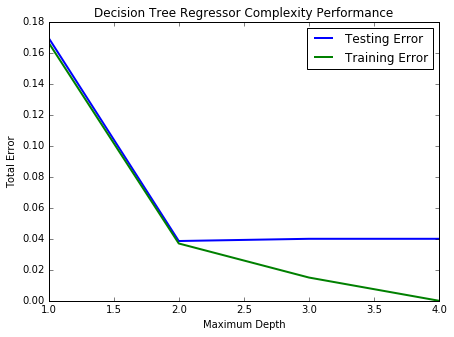

In [11]:
model_complexity(X_train, y_train, X_test, y_test)

### 2.3 Сравнительный анализ предиктивных моделей

In [12]:
from time import time
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print("Made predictions in {:.4f} seconds.".format(end - start))
    return f1_score(target, y_pred, average='weighted')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print("F1 score for test set: {:.4f}.\n".format(predict_labels(clf, X_test, y_test)))

In [15]:
# TODO: Import the three supervised learning models from sklearn
from sklearn import tree
from sklearn import svm
from sklearn import naive_bayes

# TODO: Initialize the three models
clf_A = tree.DecisionTreeClassifier()
clf_B = svm.SVC()
clf_C = naive_bayes.MultinomialNB()

# TODO: Set up the training set sizes
X_train_100 = X_train[:35]
y_train_100 = y_train[:35]

X_train_200 = X_train[:70]
y_train_200 = y_train[:70]

X_train_300 = X_train
y_train_300 = y_train

# TODO: Execute the 'train_predict' function for each classifier and each training set size
print("##### DECISION TREE CLASSIFIER #####")
train_predict(clf_A, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_A, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_A, X_train_300, y_train_300, X_test, y_test)
print("\n")
print("##### SUPPORT VECTOR MACHINES CLASSIFIER #####")
train_predict(clf_B, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_B, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_B, X_train_300, y_train_300, X_test, y_test)
print("\n")
print("##### NAIVE BAYES CLASSIFIER #####")
train_predict(clf_C, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_C, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_C, X_train_300, y_train_300, X_test, y_test)

##### DECISION TREE CLASSIFIER #####
Training a DecisionTreeClassifier using a training set size of 35. . .
Trained model in 0.0009 seconds
Made predictions in 0.0001 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.9403.

Training a DecisionTreeClassifier using a training set size of 70. . .
Trained model in 0.0010 seconds
Made predictions in 0.0003 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.9600.

Training a DecisionTreeClassifier using a training set size of 100. . .
Trained model in 0.0004 seconds
Made predictions in 0.0001 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0001 seconds.
F1 score for test set: 0.9600.



##### SUPPORT VECTOR MACHINES CLASSIFIER #####
Training a SVC using a training set size of 35. . .
Trained model in 0.0013 seconds
Made predictions in 0.0006 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0004 secon

### 2.4 Настройка выбранной модели

In [16]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Set of various parameters for grid search
parameters = {'kernel':['linear', 'rbf', 'poly'], 'C':[0.3, 0.7, 1.0], 'degree':[2,3]}

# Initialize the classifier
clf = svm.SVC()

# Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, average='weighted')

# Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, f1_scorer)

# Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print("Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train)))
print("Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test)))

Made predictions in 0.0002 seconds.
Tuned model has a training F1 score of 0.9799.
Made predictions in 0.0003 seconds.
Tuned model has a testing F1 score of 0.9801.
